#### importing libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# read dataset
df = pd.read_csv('C:/Users/mahap/Desktop/PGDBDA/STATISTICS/Bank EDA/bank_marketing.csv')
df.head()

C:\Users\mahap\AppData\Local\Temp\ipykernel_15592\1190303528.py:2: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/mahap/Desktop/PGDBDA/STATISTICS/Bank EDA/bank_marketing.csv')


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


#### Data Cleaning
Fixing row

Delete summary rows

Delete incorrect rows like header and footer rows

In [77]:
df = pd.read_csv('C:/Users/mahap/Downloads/bank_marketing.csv', skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Fixing Columns
delete unnecessary columns

Split column to get more data

Merge column to create unique identifier if required.

Add missing column names

Rename column with a consistency w.r.t abbreviation or encoded columns

Align misaligned columns

In [80]:
# deleting customerid column
df.drop("customerid", axis = 1, inplace = True)
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [82]:
# Split jobedu to get job and education data
df['job'] = df.jobedu.apply(lambda x: x.split(',')[0])
df['education'] = df.jobedu.apply(lambda x: x.split(',')[1])
df.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [84]:
# Deleting Jobedu as its not required
df.drop('jobedu', axis=1, inplace = True)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [86]:
# Split month
# df.month.apply(lambda x : x.split(',')[0])

# Lets check why month is showing float object
df.month.apply([lambda x : isinstance(x, float) == True]).value_counts()

<lambda>
False       45161
True           50
Name: count, dtype: int64

#### Missing Values
Set values as missing values like 'NA','XX','999'

Fill missing values with :
     constant, function(mean, median, mode etc.), external data
     
Use imputation techniques like K-Nearest Neighbors (KNN), Multiple Imputation by
     
Interpolate missing values : Linear, polynomial, spline, etc.

Remove missing values : Delete rows or columns

Fill partial missing values: missing time zone, century

In [89]:
# Check Missing values
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

###### Handling missing values of Age column

In [92]:
df.age.isnull().sum()/df.shape[0]

0.00044237021963681403

##### Less than 1% record, we will drop them

In [95]:
df1 = df[~ df.age.isnull()].copy() # copy ensures that changes in df1 does not effect df else df1 would be a view of df and any changes in df1  might affect df
df1.age.isnull().sum()

0

##### Handling missing value of month

In [98]:
df1.month.isnull().sum()

50

In [100]:
df1.month.value_counts(normalize= True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [102]:
month_mode = df1.month.mode()[0]
df1.month.fillna(month_mode, inplace= True)
df1.month.value_counts(normalize= True)

C:\Users\mahap\AppData\Local\Temp\ipykernel_15592\2841904955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.month.fillna(month_mode, inplace= True)


month
may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: proportion, dtype: float64

##### Handling missing value of response

In [105]:
df1.response.isnull().sum()

30

In [107]:
df1.response.value_counts()

response
no     39876
yes     5285
Name: count, dtype: int64

In [109]:
response_mode = df1.response.mode()[0]
df1.response.fillna(response_mode, inplace= True)
df1.response.value_counts()

C:\Users\mahap\AppData\Local\Temp\ipykernel_15592\3073028689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.response.fillna(response_mode, inplace= True)


response
no     39906
yes     5285
Name: count, dtype: int64

In [111]:
#df1.pdays.value_counts(normalize = True)
df1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

##### for pdays -1 is encoded as missing value, we will replace it with NAN so it will be treated as missing value and summary statistics won't get affected.

In [114]:
df1.loc[df1.pdays<0, 'pdays'] = np.NaN

In [116]:
df1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

##### Missing value does not always have to be null.

#### Outliers

Values that do not belong to normal values.

Investigate the Outliers

Treatment of Outliers

 1. Missing Value : Imputation
 2. Expected but rare : Exclude the outlier
 3. Binning the Value
 4. cap the Outliers e.g 10000 to 1000

#### Types of Outliers:

1.Univariate Outliers

2.Multivariate Outliers

3.Univariate Outliers Analysis

In [120]:
# Age variable
df1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

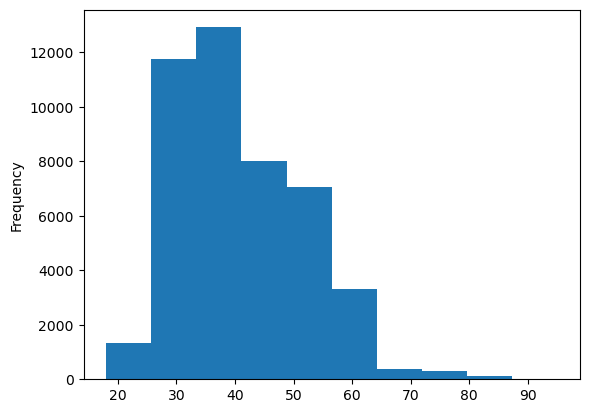

In [122]:
df1.age.plot.hist()

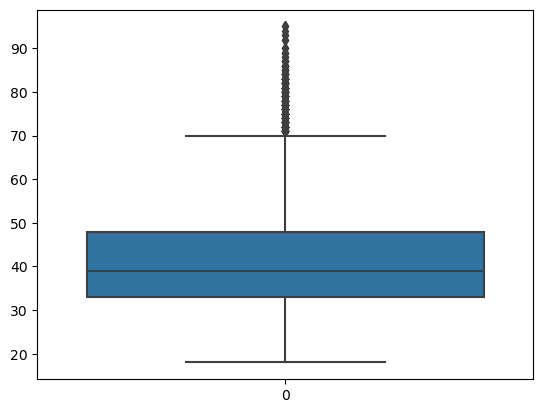

In [123]:
sns.boxplot(df1.age)
plt.show()

In [126]:
# Balance variable
df1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

##### -8019 could be possible in bank statement due to loan amount. However, there is vast difference between 75 quantile and max.

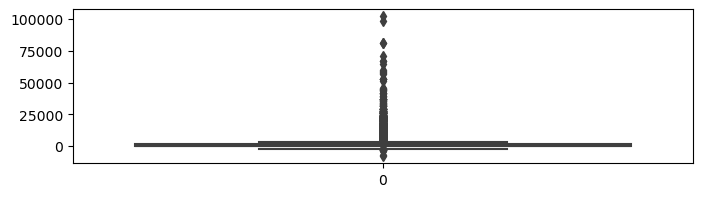

In [129]:
plt.figure(figsize = [8,2])
sns.boxplot(df1.balance)
plt.show()

#### Lets check through quantiles

In [132]:
df1.balance.quantile([0.5,0.75,0.9,0.95,0.99])

0.50      448.0
0.75     1428.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [134]:
df1[df1.balance > 5000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,607.000000,2844.000000
mean,43.676160,63002.109705,9826.712377,16.098101,2.667018,190.835255,0.686357
std,11.465631,33521.450587,7265.021441,7.897952,3.030950,104.221137,2.166823
min,19.000000,0.000000,5003.000000,1.000000,1.000000,8.000000,0.000000
25%,34.000000,50000.000000,5960.250000,9.000000,1.000000,103.500000,0.000000
50%,42.000000,60000.000000,7572.500000,18.000000,2.000000,176.000000,0.000000
75%,52.000000,100000.000000,10760.500000,21.000000,3.000000,248.000000,0.000000
max,87.000000,120000.000000,102127.000000,31.000000,63.000000,779.000000,35.000000


##### This suggest that the customer with an mean age of 43 has mean salary of 63,000 which is quite fair. Can't remove them.

#### Standardizing values
1.Numerics:

Standardize units : lbs to kgs, km/hr to m/s

Standardize values : 0-1 range for all values( fit to percentage scale)

Standardize precision : 2.0987 to 2.09

2.Text:

Remove extra characters

Standardize Case : Uppercase, Lowercase,Title case

Standardize format : 04/11/24 to 2024/11/04 or any string

In [138]:
# Duration variable
df1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [140]:
df1.duration.value_counts()

duration
1.5 min                 138
1.68333333333333 min    129
2.06666666666667 min    129
1.73333333333333 min    127
2.03333333333333 min    127
                       ... 
1500 sec                  1
22.1666666666667 min      1
868 sec                   1
1269 sec                  1
16.2833333333333 min      1
Name: count, Length: 2646, dtype: int64

In [142]:
df1.duration = df1.duration.apply(lambda x : round(float(x.split()[0])/60,2) if x.split()[1] =='sec' else float(x.split()[0]))

In [144]:
df1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.35,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.52,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.27,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.53,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.30,1,NaN,0,unknown,no,unknown,unknown


#### Fix Invalid Values
1.Correct incorrect datatypes

String to numeric

String to date

2.Correct values not in list: Country or pincode

3.Correct wrong structures : Phone number > 10 digits

4.Correct values beyond range : temp < -273C

5.Validate Internal rule: Date of delivery > date of ordering

If invalid values can't be trated then treat them as missing values and treat them accordingly.

In [147]:
df1.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

#### Filter Data
Deduplicate data : Identical rows

Filter Rows : filter segments or data period

Filter Columns : Relavant column for analysis

Aggregate data : Group by required keys and aggreate on rest

In [150]:
# Check duplicated records
df1.duplicated().sum()

0

In [152]:
# Filter columns
df2 = df1.drop(['contact', 'day','month','pdays'], axis = 1)
df2.head()

,age,salary,balance,marital,targeted,default,housing,loan,duration,campaign,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,4.35,1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,2.52,1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,1.27,1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,1.53,1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,3.30,1,0,unknown,no,unknown,unknown


#### Data Analysis

Univariate Anaysis

Analysing or visualizing single variable

#### Four Types:

1.Categorical unordered univariate

2.Categorical ordered univariate

3.Continuous univariate ( Statistics)

4.Time Series univariate

Categorical unordered univariate

In [155]:
# Marital
df2.marital.value_counts()

marital
married     27204
single      12786
divorced     5201
Name: count, dtype: int64

In [157]:
df2.marital.value_counts(normalize = True)

marital
married     0.601978
single      0.282932
divorced    0.115089
Name: proportion, dtype: float64

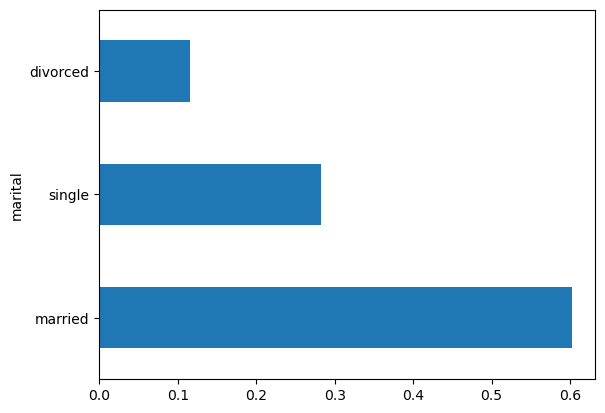

In [159]:
df2.marital.value_counts(normalize = True).plot.barh()
plt.show()

In [161]:
# Education
df2.education.value_counts(normalize= True)

education
secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: proportion, dtype: float64

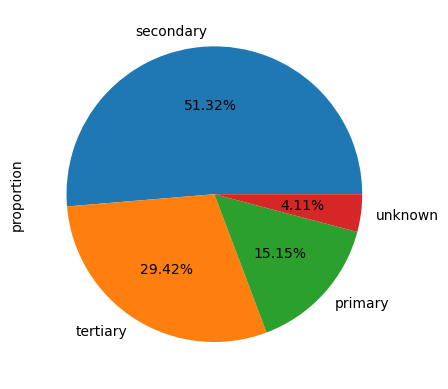

In [163]:
# Education
df2.education.value_counts(normalize= True).plot.pie(autopct = "%0.2f%%")
plt.show()

In [165]:
# poutcome variable
df2.poutcome.value_counts(normalize= True)

poutcome
unknown    0.817508
failure    0.108384
other      0.040716
success    0.033392
Name: proportion, dtype: float64

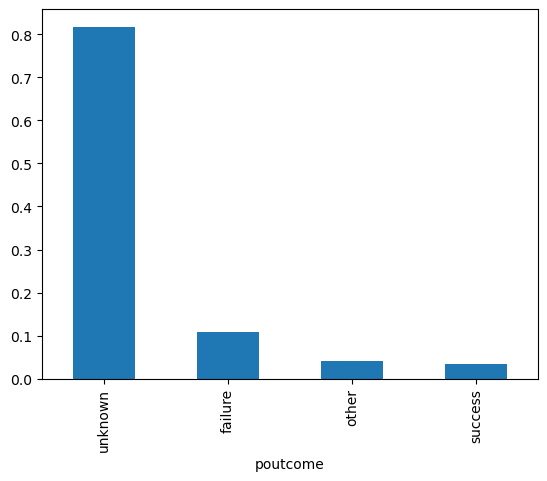

In [167]:
# poutcome variable
df2.poutcome.value_counts(normalize= True).plot.bar()
plt.show()

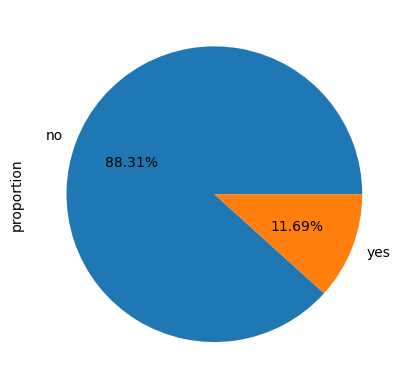

In [169]:
# response
df2.response.value_counts(normalize= True).plot.pie(autopct = "%0.2f%%")
plt.show()

#### Bivariate Analysis
Between two numerical variables

Between Numeric and Categorical variable

Between two categorical variables

#### Numerical vs Numerical
Correlation Matrix

Scatter plot

Pair Plot

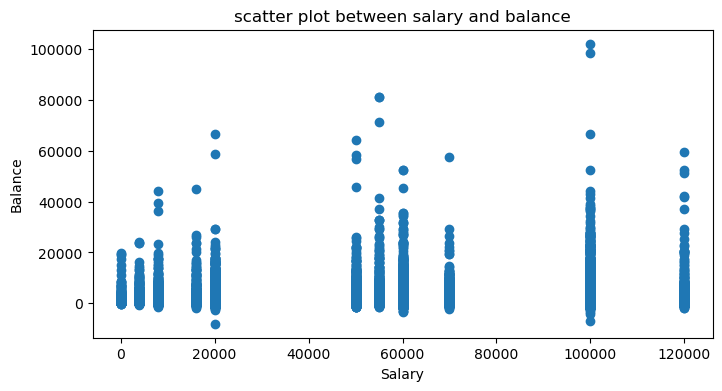

In [172]:
# scatter plot between salary and balance
plt.figure(figsize=[8,4])
plt.scatter(df2.salary, df2.balance)
plt.xlabel("Salary")
plt.ylabel("Balance")
plt.title('scatter plot between salary and balance')
plt.show()

#### The above plot does not seems to have any relationship between salary and balance

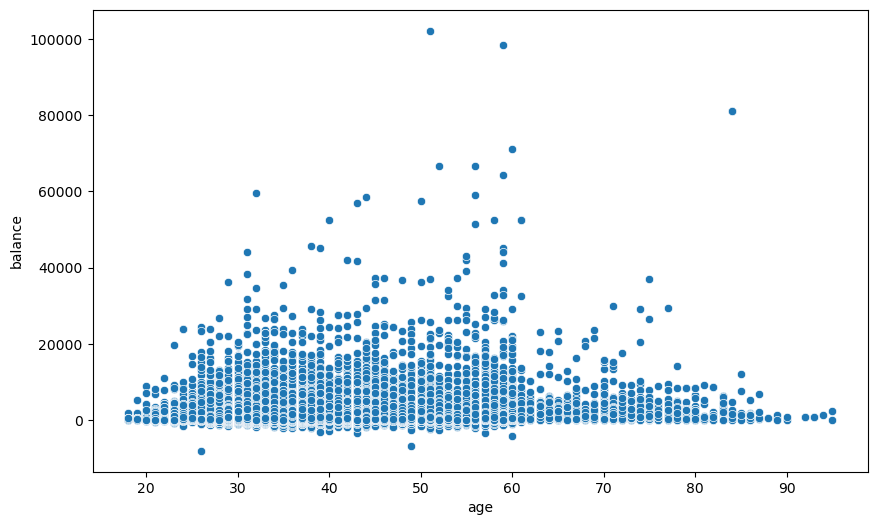

In [175]:
# scatter plot between salary and age
plt.figure(figsize=(10,6))
sns.scatterplot(x= "age", y = 'balance', data= df2)
plt.show()

C:\Users\mahap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

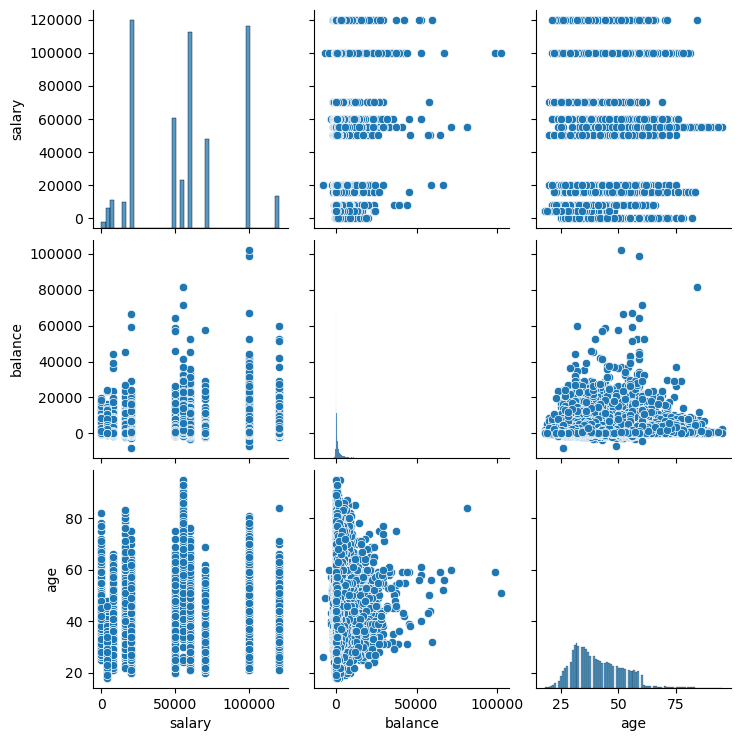

In [177]:
# pairplot between salary and balance
plt.figure(figsize=(10,6))
sns.pairplot(data= df2, vars=['salary','balance','age'])
plt.show()

#### Lets quantify the correlation values

In [179]:
# Correlation matrix
df2[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


#### Correlation Heatmap

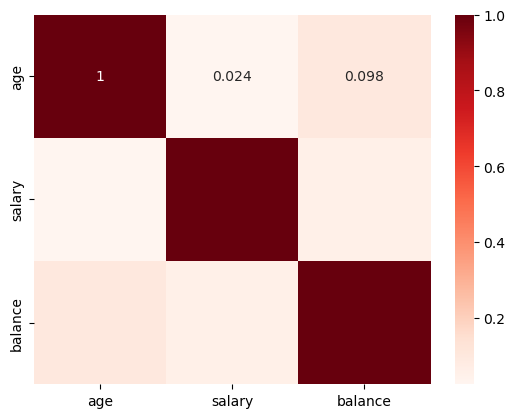

In [183]:
sns.heatmap(df2[['age','salary','balance']].corr(), annot= True, cmap='Reds')
plt.show()

#### Categorical vs Numerical

check the mean values of each category

In [186]:
# Response vs salary
df2.groupby('response')['salary'].mean()

response
no     56770.96176
yes    58780.51088
Name: salary, dtype: float64

##### Sometimes due to outliers, mean gets influenced. So we will check median

In [189]:
df2.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

##### both seems to be in same range, lets check quantile range to understand the dispersion

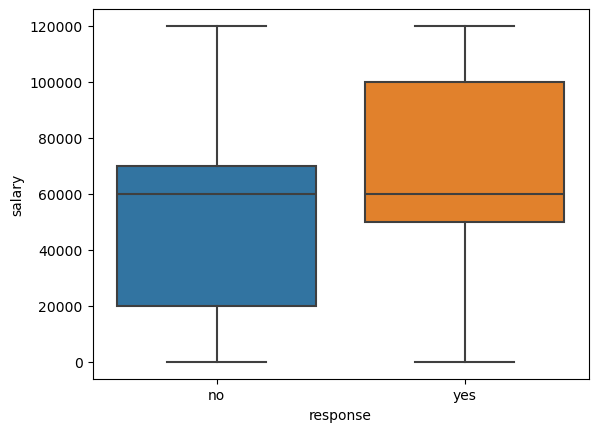

In [192]:
# Box plot
sns.boxplot(data= df2, x = 'response', y = 'salary')
plt.show()

##### The above boxplot suggests that, people who responded mostly belongs to higher salary range of 50k to 100k as compared to people who did not responded with a salary range of 20k to 70k. To get high ROI, bank should focus on people with the salary range of 50k and above.

In [195]:
# Response vs balance
df2.groupby('response')['balance'].mean()

response
no     1303.862752
yes    1804.681362
Name: balance, dtype: float64

In [197]:
# Response vs balance
df2.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

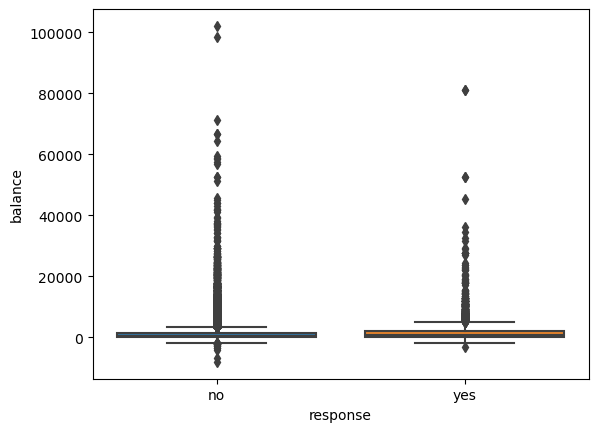

In [199]:
# Response vs balance
sns.boxplot(data= df2, x = 'response', y = 'balance')
plt.show()

In [201]:
# 75th percentile
def p75(data):
    return np.quantile(data,0.75)

In [203]:
df2.groupby('response')['balance'].aggregate(['mean','median', p75])

,mean,median,p75
response,,,
no,1303.862752,417.0,1345.0
yes,1804.681362,733.0,2159.0


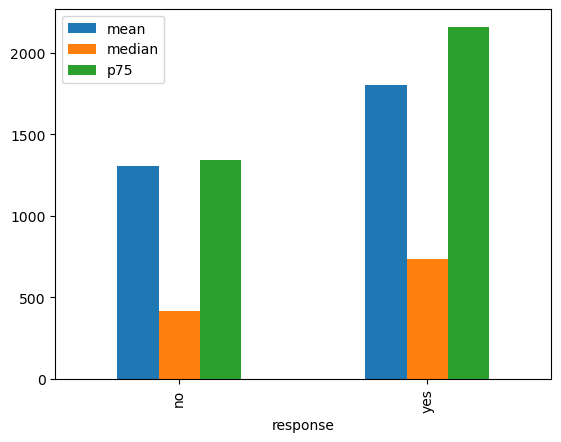

In [205]:
df2.groupby('response')['balance'].aggregate(['mean','median', p75]).plot.bar()
plt.show()

#### Categorical vs Categorical

In [208]:
df2['response_flag'] = np.where(df2.response == 'yes', 1,0)

In [210]:
df2.response_flag.value_counts()

response_flag
0    39906
1     5285
Name: count, dtype: int64

In [212]:
df2.response_flag.value_counts(normalize= True)

response_flag
0    0.883052
1    0.116948
Name: proportion, dtype: float64

In [214]:
df2.response_flag.mean()

0.11694806488017526

<Axes: xlabel='education'>

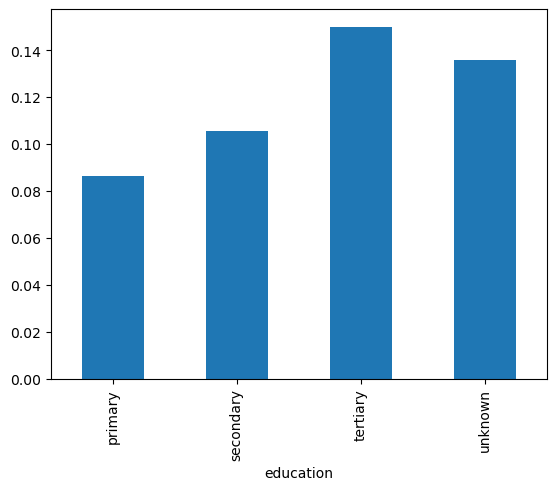

In [216]:
# Education vs response rate
df2.groupby('education')['response_flag'].mean().plot.bar()

#### Higher education tends to have more response rate as shown by tertiary with a response rate of 14% more than total average of 11%.

<Axes: ylabel='marital'>

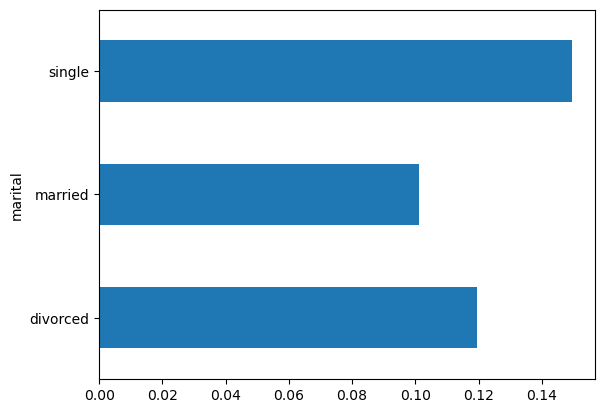

In [219]:
# marital vs response rate
df2.groupby('marital')['response_flag'].mean().plot.barh()

##### Single and divorced people tends to have more response than married people. May be due to family obligations.

<Axes: xlabel='loan', ylabel='response_flag'>

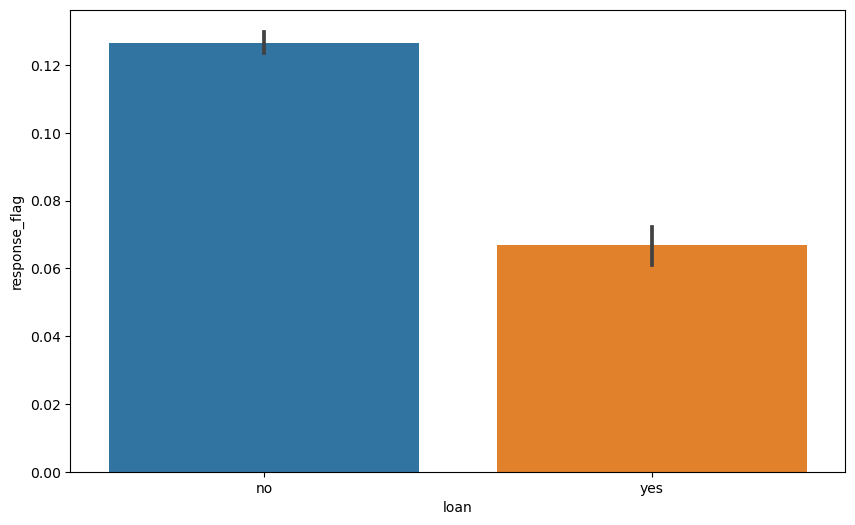

In [222]:
# loan vs response rate
plt.figure(figsize=(10,6))
sns.barplot(x='loan', y='response_flag', data=df2)

#### Single and divorced people tends to have more response than married people. May be due to family obligations.

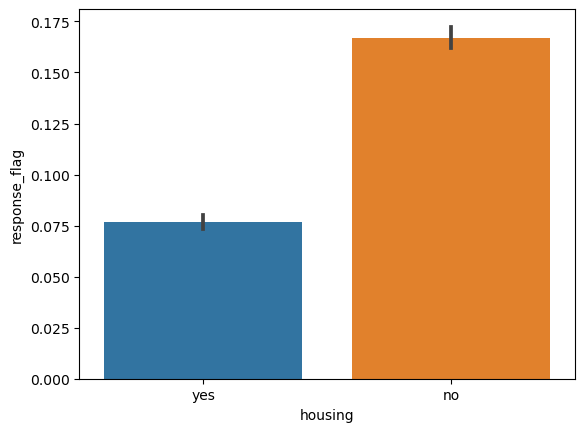

In [225]:
# housing vs response rate
sns.barplot(x= 'housing', y = 'response_flag', data = df2)
plt.show()

<Axes: xlabel='response', ylabel='age'>

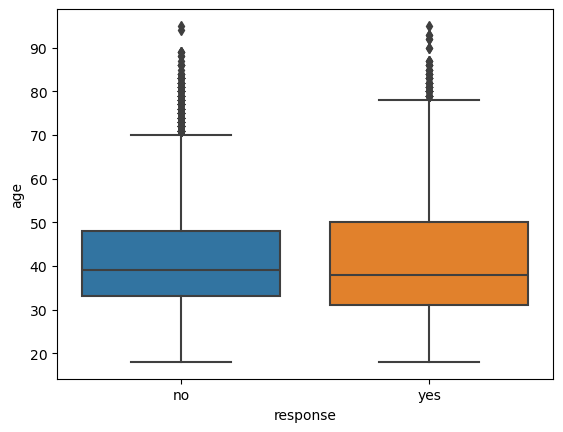

In [226]:
# age vs response
sns.boxplot(data = df2, x = 'response', y = 'age')

##### Age does not seems to be a factor in responding to a term deposit call.

In [230]:
df2.age

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    71.0
45208    72.0
45209    57.0
45210    37.0
Name: age, Length: 45191, dtype: float64

In [232]:
# Binning age
df2['age_group'] = pd.cut(df2.age, [0,30,40,50,60,120], labels= ["<30","30-40","40-50","50-60","60+"])

In [234]:
df2.age_group.value_counts(normalize= True)

age_group
30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: proportion, dtype: float64

##### Most the people belongs to the age group of 30 to 40 with 39%.

C:\Users\mahap\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


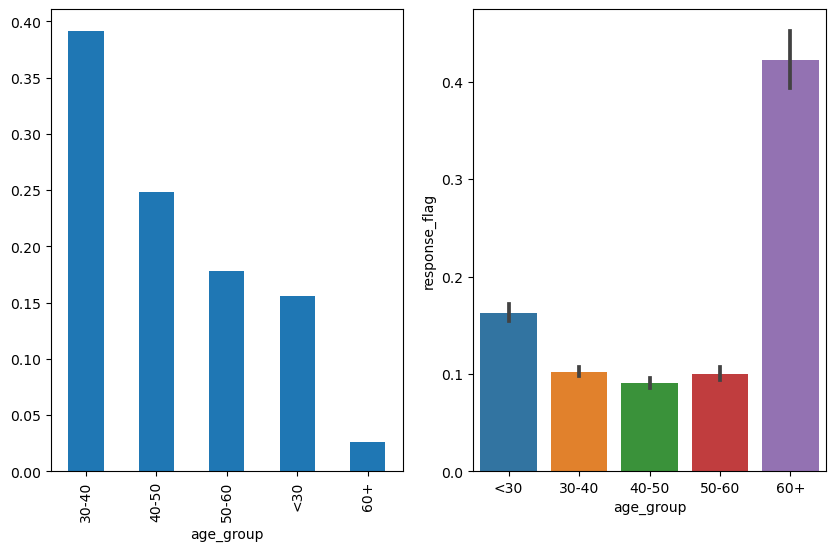

In [237]:
plt.figure(figsize = [10,6])
plt.subplot(1,2,1)
df2.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
sns.barplot(x = 'age_group', y = 'response_flag', data= df2)
plt.show()

##### Though age_group 30-40 had maximum portion of people however the highest respose rate of more than 40% is from 60+ age_group and then ~17% response rate from 30-40 age_group.

#### Multivariate Analysis
Here we will consider more than 2 variables to understand the effect of each other variables

Education vs Marital Status vs Response rate

In [241]:
pd.pivot_table(data= df2, index= 'education', columns= 'marital', values= 'response_flag')

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


<Axes: xlabel='marital', ylabel='education'>

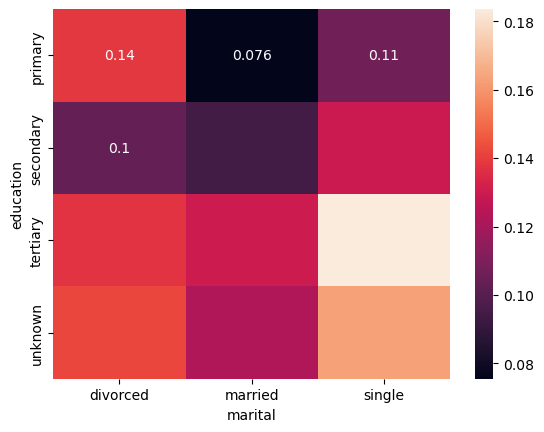

In [243]:
# Heatmap to better understand the relationship
edu_mar_res = pd.pivot_table(data= df2, index= 'education', columns= 'marital', values= 'response_flag')
sns.heatmap(edu_mar_res, annot= True)

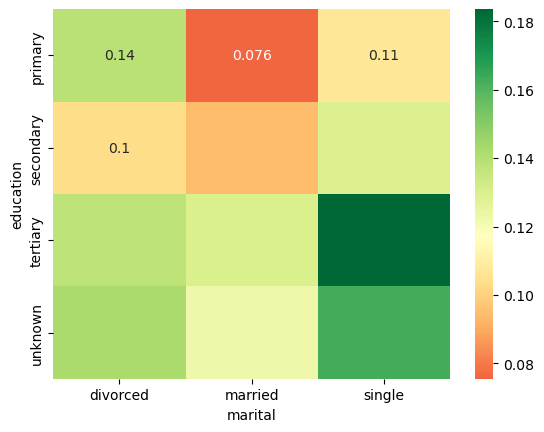

In [245]:
sns.heatmap(edu_mar_res, annot=True, cmap="RdYlGn" , center= 0.117)
plt.show()

#### The highest response rate of 18% is for the Highest education of tertiary and single people. Even all the divorced people have a tendency to respond to term deposit plans. As the education level increases, there is an increase the response rate.

Job vs Marital vs Response

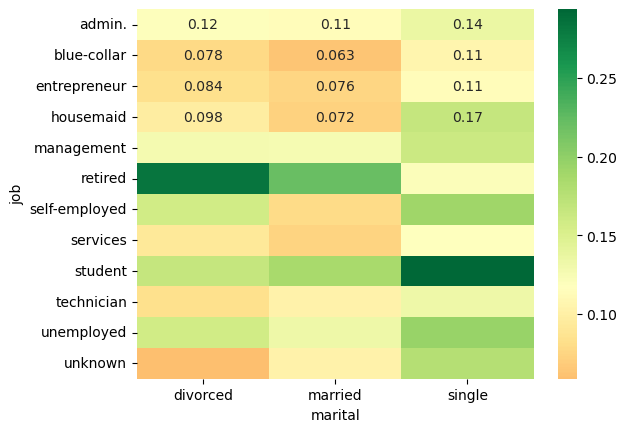

In [248]:
jb_mar_res = pd.pivot_table(data= df2, index= 'job', columns= 'marital', values= 'response_flag')
sns.heatmap(jb_mar_res, annot = True, cmap= 'RdYlGn', center = 0.117)
plt.show()

#### Single students and retired divorcee has the highest and second highest response rate of 29% and 28% respectively. Retired married couple can also be targeted for their response rate.

Education vs poutcomes vs response

<Axes: xlabel='poutcome', ylabel='education'>

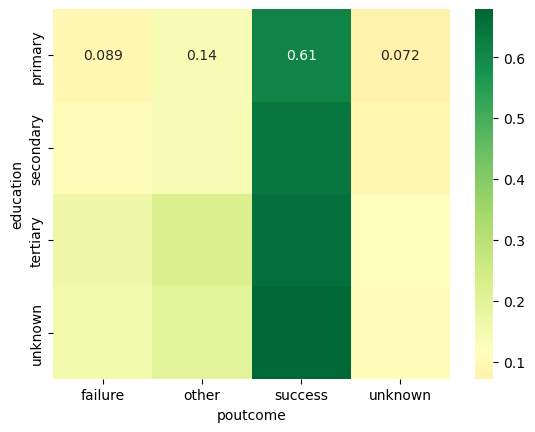

In [251]:
edu_pout_res = pd.pivot_table(data= df2, index= 'education', columns= 'poutcome', values= 'response_flag')
sns.heatmap(edu_pout_res, annot=True, cmap="RdYlGn", center= 0.117)

#### Since there is no red tiles, then we might need to check mean specifically for poutcome.

In [254]:
df2[df2.poutcome != 'unknown'].response_flag.mean()

0.23050806353825634

<Axes: xlabel='poutcome', ylabel='education'>

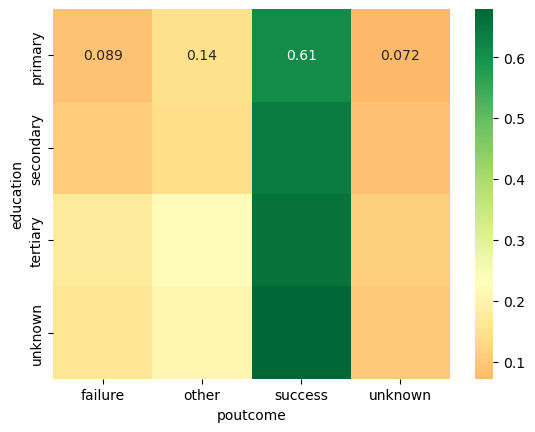

In [256]:
sns.heatmap(edu_pout_res, annot=True, cmap="RdYlGn", center= 0.23)

#### People who had responded last time they tend to respond again with an average response rate of 60% and that also response rate increases with the increase of education level.

In [259]:
df.to_csv('C://Users//mahap//Desktop//PGDBDA//bank_campaign1.csv', index=False)
print('data is saved')

data is saved
